In [5]:
import numpy as np
import itertools
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import *
from sklearn.tree import *
from sklearn.preprocessing import StandardScaler

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from itertools import combinations

# Load the dataset
data = pd.read_csv('filtered_data.csv')

# Get the column names
all_columns = ['COM-1', 'COM-2', 'POP-1', 'STA-1', 'STA-2', 'STA-3', 'STA-4', 'STA-5', 'STA-6', 'STA-7', 'STA-8', 'STA-9', 'TEC-1', 'TEC-2', 'TEC-3', 'TEC-4']

# Dictionary to store scores for each combination
scores_dict = {}

# Number of iterations
num_iterations = 10000

# Run the process multiple times
for _ in range(num_iterations):
    for x_columns_size in range(1, len(all_columns) + 1):
        for x_columns_combination in combinations(all_columns, x_columns_size):
            # Check if the combination size is 1
            if len(x_columns_combination) == 1:
                # Extract features (X) and target (y)
                X_features = data[list(x_columns_combination)]
                for y_column in all_columns:
                    if y_column not in x_columns_combination:
                        y_target = data[y_column]

                        # Split the data into training and testing sets
                        X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2)

                        # Perform linear regression
                        model = LinearRegression()
                        model.fit(X_train, y_train)

                        # Calculate the score
                        score = model.score(X_test, y_test)

                        # Store the score in the dictionary
                        key = f"X:{x_columns_combination[0]}, y:{y_column}"
                        if key not in scores_dict:
                            scores_dict[key] = []
                        scores_dict[key].append(score)

# Print the average scores for each combination in descending order
sorted_scores = sorted(scores_dict.items(), key=lambda x: sum(x[1]) / len(x[1]), reverse=True)
for key, scores in sorted_scores:
    average_score = sum(scores) / len(scores)
    print(f"{key}, Average Score: {average_score}")


X:STA-3, y:POP-1, Average Score: 0.8352832256705973
X:POP-1, y:STA-3, Average Score: 0.7813648646413175
X:STA-8, y:COM-2, Average Score: 0.6125672017185535
X:STA-8, y:STA-9, Average Score: 0.5872519115358779
X:COM-2, y:STA-8, Average Score: 0.5549215875745769
X:STA-9, y:STA-8, Average Score: 0.5198830600322931
X:STA-9, y:POP-1, Average Score: 0.4590446447858435
X:STA-9, y:STA-3, Average Score: 0.4243814494090604
X:STA-8, y:STA-3, Average Score: 0.39290472702595125
X:STA-8, y:POP-1, Average Score: 0.35691517945331047
X:COM-2, y:STA-9, Average Score: 0.2804580648858648
X:STA-3, y:STA-8, Average Score: 0.2675473922380108
X:POP-1, y:STA-8, Average Score: 0.2602329983393368
X:STA-5, y:STA-9, Average Score: 0.2548108917870096
X:STA-7, y:STA-4, Average Score: 0.25181636786743716
X:TEC-1, y:TEC-4, Average Score: 0.24186663029577407
X:COM-2, y:TEC-4, Average Score: 0.2036488072702543
X:STA-9, y:TEC-3, Average Score: 0.19906421193321608
X:STA-7, y:STA-2, Average Score: 0.1987739403944763
X:STA-9

In [ ]:
#plotting the Scatter plot to check relationship between Sal and Temp
sns.lmplot(x ="Horizontal", y ="Vertical", data = df_binary, order = 2, ci = None)
plt.grid()
plt.show()


KeyError: "None of [Index(['Horizontal', 'Vertical'], dtype='object')] are in the [columns]"

In [ ]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and fit the logistic regression model with increased max_iter
regr = LogisticRegression(max_iter=1000)
regr.fit(X_train_scaled, y_train.ravel())

# Make predictions on the scaled test set
y_pred = regr.predict(X_test_scaled)

# Evaluate the model
accuracy = regr.score(X_test_scaled, y_test)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.02


In [ ]:
from sklearn.neural_network import MLPClassifier

# Create and fit the neural network model
mlp_classifier = MLPClassifier()
mlp_classifier.fit(X_train, y_train.ravel())

# Evaluate the model
print(mlp_classifier.score(X_test, y_test))


0.0


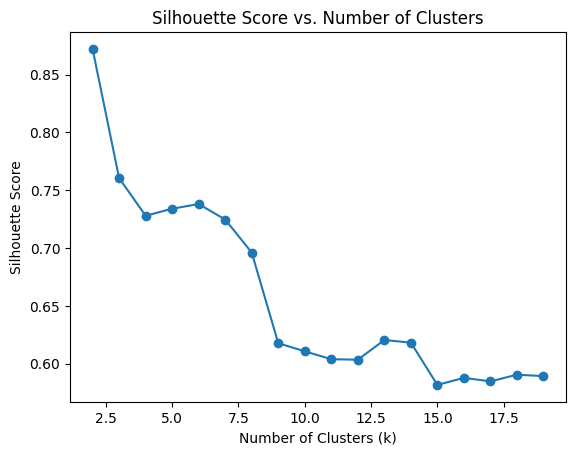


Cluster 0:

              COM-1          COM-2          POP-1      STA-1        STA-2  \
count  3.100000e+01      31.000000      31.000000  31.000000    31.000000   
mean   5.467849e+06   33199.580645   20640.290323   9.553154    19.741935   
std    4.300076e+06   20931.286966   27265.270055   2.775766   474.851624   
min    4.276666e+05    4536.000000     889.000000   5.332534 -1219.000000   
25%    2.585035e+06   21855.500000    5085.500000   7.299199   -69.500000   
50%    3.762452e+06   26585.000000   10447.000000   8.864248    56.000000   
75%    6.541064e+06   38998.500000   23143.500000  12.221575   266.000000   
max    1.748868e+07  108630.000000  115367.000000  13.617841  1110.000000   

              STA-3       STA-4      STA-5      STA-7        STA-8  ...  \
count     31.000000   31.000000  31.000000  31.000000    31.000000  ...   
mean    3512.548387   30.000000   6.516129  18.516129  1804.516129  ...   
std     4918.648431   96.259372   5.830214  34.349062   718.580307  

In [ ]:
from sklearn.preprocessing import StandardScaler

# Assuming X is your feature matrix
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Choose a range of values for k
k_values = range(2, 20)

# Calculate the silhouette score for each value of k
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Plot the silhouette scores
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.show()

# Choose the optimal k (e.g., from the elbow method)
optimal_k = 3

# Apply k-means clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to the original dataset
df_clustered = df.copy()
df_clustered['Cluster'] = clusters

# Explore characteristics of each cluster
for cluster_id in range(optimal_k):
    cluster_data = df_clustered[df_clustered['Cluster'] == cluster_id]
    print(f'\nCluster {cluster_id}:\n')
    print(cluster_data.describe())


In [ ]:
import autosklearn.regression
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming X and y are your feature and target variables
# X, y = ...

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the AutoML regressor
automl = autosklearn.regression.AutoSklearnRegressor(time_left_for_this_task=120, per_run_time_limit=30, n_jobs=-1)
automl.fit(X_train, y_train)

# Make predictions on the test set
y_pred = automl.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Access additional information about the AutoML process
print(automl.sprint_statistics())


ModuleNotFoundError: No module named 'autosklearn'